# The characteristics of Amazon reviews for the star ratings. 
## by Kyle McMillan

## Investigation Overview

For this investigation, I want to investigate the charateristics of Amazon reviews. The main aspect that I want to focus on is to see if there is a relationship between the review helpful votes and word length. This can be used to determin if there is a recommened word length for a review

## Dataset Overview

This investigation explores the Amazon US marketplace reviews dataset containing approximately 7 million unique reviews, that cover various different aspects of each review. Each review has the body, star rating, total and helpful votes as well as the category and product that each review belongs too. Customers are listed by a unique string assigned to them.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator
import seaborn as sb
import re
import random
import statistics

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
reviews=pd.read_csv(r"amazon_reviews_clean.csv")

In [3]:
#Convert columns to the correct data type.
reviews['review_date']=pd.to_datetime(reviews.review_date)
reviews['vine'] = reviews.vine.map({'N':False, 'Y':True}).astype(bool)
reviews['star_rating']=pd.to_numeric(reviews.star_rating, downcast="integer")
reviews['helpful_votes']=pd.to_numeric(reviews.helpful_votes, downcast="integer")
reviews['total_votes']=pd.to_numeric(reviews.total_votes, downcast="integer")
reviews['verified_purchase'] = reviews.verified_purchase.map({'N':False, 'Y':True}).astype(bool)
reviews['customer_id'] = reviews.customer_id.astype(str)
reviews['product_parent'] = reviews.product_parent.astype(str)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of the helpful votes

The number of helpful votes is a right skewed distribution. There is a peak around 8 helpful votes per review. The range on this is around 5 votes up to a peak above 10,000 votes. Both of the axis have been plotted on log scales.

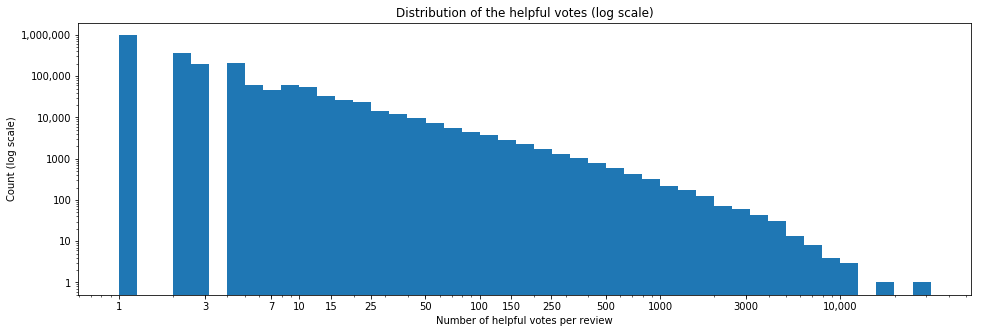

In [4]:
#The above histogram and its bin values show that there's a long tail in the distribution, that goes out quite 
#far so I'll move it to a log scale.
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(reviews.helpful_votes.max())+log_binsize, log_binsize)

plt.figure(figsize=[16, 5])
plt.hist(data=reviews, x="helpful_votes", bins = bins)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Count (log scale)')
plt.yticks([1e0, 1e1, 1e2, 1e3, 1e4, 1e5,1e6], ['1', '10', '100', '1000', '10,000', '100,000','1,000,000'])
plt.xticks([1e0, 3e0, 7e0, 1e1, 1.5e1, 2.5e1, 5e1, 1e2, 1.5e2, 2.5e2, 5e2, 1e3, 3e3, 1e4], ['1', '3','7', '10', '15', '25', '50', '100', '150', '250', '500', '1000', '3000', '10,000'])
plt.xlabel('Number of helpful votes per review')
plt.title('Distribution of the helpful votes (log scale)')
plt.show()

## Distribution of the word count in the review body length

This violin plot of the distribution of the word count in the review body for a review. The review word count has a wide range; going from 1 all the way to around 10,000 words. This violin plot also lets us easily see that the 75th percentile for the distribution is a little under 100 words.

Text(0.5, 0, 'Review body word count (log scale)')

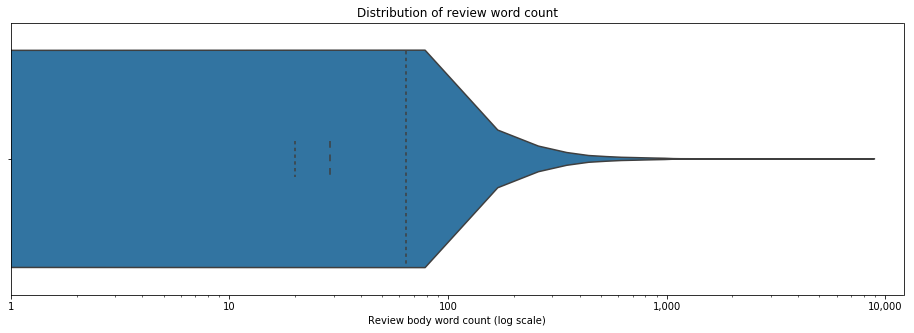

In [5]:
#plot the number of words per review on a violin plot with the x-axis on a log scale
plt.figure(figsize=[16, 5])
sb.violinplot(x = reviews["review_body_len"], inner = 'quartile')
plt.xscale('log')
plt.xticks([1e0, 1e1, 1e2, 1e3, 1e4], ['1', '10', '100', '1,000', '10,000'])
plt.title('Distribution of review word count');
plt.xlabel('Review body word count (log scale)')

## The correlation between helpful votes and review word count

This correlation plot between the helpful votes and word count looks like there is very little correlation between them. Adding in a line of best fit shows that there is a slight correlation. The longer a review length is does not mean that the review will get more helpful votes and that there is still more that would need to be investigated to see a good correlation.


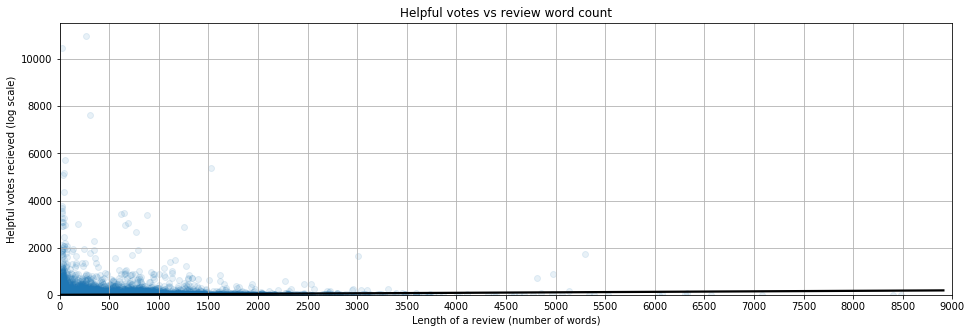

In [6]:
#Use a sample to speed up the calculation time.
review_samp2 = reviews.sample(n=1000000, random_state=84)

#Compare the helpful votes recieved to the length of the review and plot a line of best fit - y-axis on a linear scale
plt.figure(figsize=[16, 5])
sb.regplot(x="review_body_len", y="helpful_votes", data=review_samp2, scatter_kws={'alpha':0.1}, line_kws={'color':'black'})
plt.xlim(left=0, right=9000)
plt.ylim(bottom=1e0)
# plt.yscale('log')
# plt.yticks([1e0, 3e0, 1e1, 3e1, 1e2, 3e2, 1e3, 3e3, 1e4], ['1', '3', '10', '30', '100', '300', '1,000', '3,000', '10,000'])
plt.xlabel('Length of a review (number of words)')
plt.xticks(np.arange(0, 9500, 500))
plt.ylabel('Helpful votes recieved (log scale)')
plt.title('Helpful votes vs review word count')
plt.grid(True)

## Helpful votes against review word count by star rating

This graph contains a sample of 100,000 reviews. Similar to the graph above this is word count versus helpful votes and the split by star rating. While the stars are seperated by colour, as there are some many points it makes it difficult to see the distribution of the points, so I have also added in lines of best fit for each star to get a better indication of the distribution. 

Interestingly, it looks like the 2 star ratings with have a higher word count and helpful votes and the lowest being 4 stars.

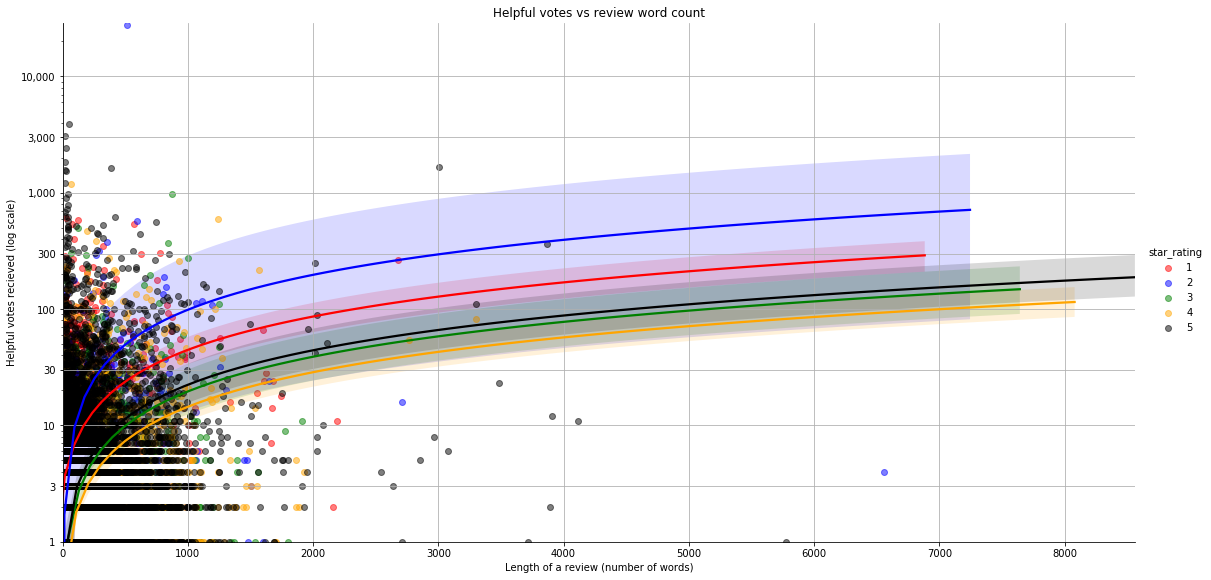

In [10]:
#Use a sample to speed up the calculation time.
review_samp4 = reviews.sample(n=100000, random_state=184)

#Compare the helpful votes recieved to the length of the review and plot a line of best fit split by star rating - log scale
colours = {1: "red", 2: "blue", 3: "green", 4: "orange", 5:"black"}
sb.lmplot(x="review_body_len", y="helpful_votes", data=review_samp4, scatter_kws={'alpha':0.5}, hue='star_rating', palette=colours, height=8, aspect=2)
plt.xlim(left=1e0)
plt.ylim(bottom=1e0)
plt.yscale('log')
plt.yticks([1e0, 3e0, 1e1, 3e1, 1e2, 3e2, 1e3, 3e3, 1e4], ['1', '3', '10', '30', '100', '300', '1,000', '3,000', '10,000'])
plt.xlabel('Length of a review (number of words)')
plt.ylabel('Helpful votes recieved (log scale)')
plt.title('Helpful votes vs review word count')
plt.grid(True);

## Trend of helpful votes and review word count against star ratings

Since the graph above is showing that 2 star ratings with a higher word count are more likely to recieve a higher number of helpful votes, let's look at the trend between helpful votes and review word counts between all the star ratings.  
The 1 star ratings have more helpful votes than other star ratings, but are the second lowest in terms of word count. The highest word count reviews are in the 2 star ratings and they also have the second highest number of helpful reviews.  
Overall it would seem that a fewer number of words for 1 star ratings are also the most helpful to people.

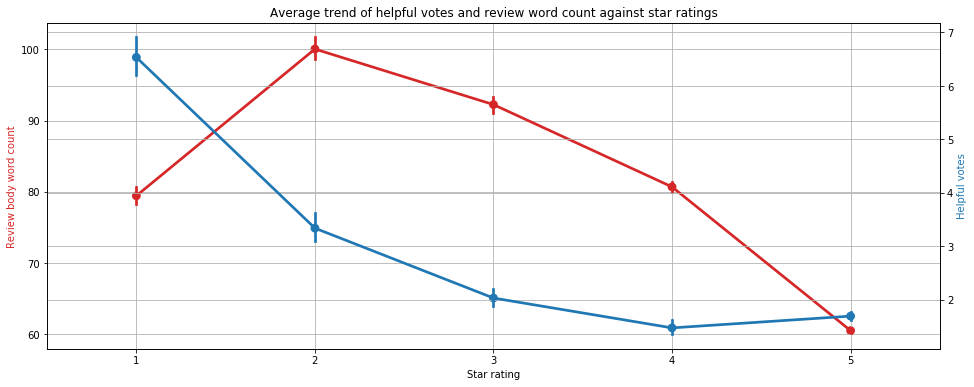

In [9]:
#Use a sample to speed up the calculation time.
review_samp3 = reviews.sample(n=1000000, random_state=85)

#Put 2 plots on the same axis with different scales
fig, ax1 = plt.subplots(figsize=(16, 6))

#Average of the review body word count vs star rating
colour = 'tab:red'
sb.pointplot(x="star_rating", y="review_body_len", data=review_samp3, color=colour)
ax1.set_xlabel('Star rating')
ax1.set_ylabel('Review body word count', color=colour)
ax1.grid(True)

#Average of the review helpful votes vs star rating
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
colour = 'tab:blue'
sb.pointplot(x="star_rating", y="helpful_votes", data=review_samp3, color=colour)
ax2.set_xlabel('Star_rating')
ax2.set_ylabel('Helpful votes', color=colour)
ax2.grid(True)

plt.title("Average trend of helpful votes and review word count against star ratings")
plt.show();